<center>

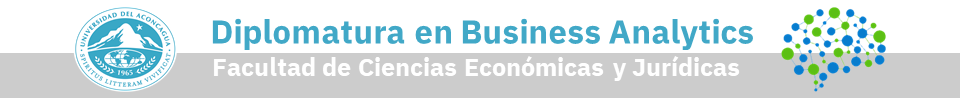

</center>

<center>
<font color="#41a8c7">
<h2><b>
Trabajo Final Módulo 10

</font>
</center>

~~~
Apellido y Nombre: Russo Gaston
~~~

**Instrucciones del Trabajo Final**

- Desarrollar los puntos necesarios para generar el modelo de regresión > 0.77 $R^2$.
- Utilice PyCaret.
- Utilice un método de ensamble.
- Puede generar graficos en cualquier instancia del desarrollo.
- Al final del colab, generar una breve conclusión.

# **Carga de módulos y datos necesarios**

In [1]:
import pandas as pd
import numpy as np

# **Creación del DataFrame**

In [2]:
datos = "https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_10_Regresion/propiedades.csv"
df = pd.read_csv(datos)
df

,id,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,0,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,80.0,NaN,235000
1,1,Argentina,Capital Federal,Belgrano,NaN,NaN,1.0,NaN,40.0,105000
2,2,Argentina,Capital Federal,San Telmo,1.0,NaN,1.0,34.0,31.0,109183
3,3,Argentina,Capital Federal,Villa Urquiza,2.0,NaN,1.0,NaN,51.0,110000
4,4,Argentina,Capital Federal,Belgrano,6.0,4.0,2.0,190.0,178.0,550000
...,...,...,...,...,...,...,...,...,...,...
44673,44673,Argentina,Capital Federal,Monte Castro,2.0,1.0,1.0,56.0,54.0,115000
44674,44674,Argentina,Capital Federal,Barrio Norte,2.0,1.0,1.0,NaN,NaN,105000
44675,44675,Argentina,Capital Federal,Colegiales,2.0,1.0,1.0,45.0,40.0,99000
44676,44676,Argentina,Capital Federal,Colegiales,1.0,1.0,1.0,59.0,59.0,105000


- l1 - país
- l2 - provincia o ciudad
- l3 - barrio
- rooms - cantidad de habitaciones
- bedrooms - cantidad de dormitorios
- bathrooms - cantidad de baños
- surface_total - superficie total
- surface_covered - superficie cubierta
- price - precio

# **Generación del modelo de regresión**

## Instalamos PyCaret

In [3]:
!pip install pycaret

     |████████████████████████████████| 266 kB 5.0 MB/s 
     |████████████████████████████████| 261 kB 48.8 MB/s 
     |████████████████████████████████| 1.7 MB 52.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 271 kB 65.0 MB/s 
     |████████████████████████████████| 14.6 MB 122 kB/s 
     |████████████████████████████████| 1.3 MB 72.1 MB/s 
     |████████████████████████████████| 167 kB 61.4 MB/s 
     |████████████████████████████████| 80 kB 8.1 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 2.0 MB 71.3 MB/s 
     |████████████████████████████████| 111 kB 57.6 MB/s 
     |████████████████████████████████| 6.8 MB 26.4 MB/s 
     |████████████████████████████████| 675 kB 47.6 MB/s 
     |████████████████████████████████| 596 kB 55.7 MB/s 
     |██████████████████

## Analisis exploratorio y preprocesamiento

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44678 entries, 0 to 44677
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               44678 non-null  int64  
 1   l1               44678 non-null  object 
 2   l2               44678 non-null  object 
 3   l3               44382 non-null  object 
 4   rooms            43547 non-null  float64
 5   bedrooms         38623 non-null  float64
 6   bathrooms        43371 non-null  float64
 7   surface_total    39856 non-null  float64
 8   surface_covered  40641 non-null  float64
 9   price            44678 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 3.4+ MB


In [5]:
df.drop(columns=["id","l1","l2"], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44678 entries, 0 to 44677
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   l3               44382 non-null  object 
 1   rooms            43547 non-null  float64
 2   bedrooms         38623 non-null  float64
 3   bathrooms        43371 non-null  float64
 4   surface_total    39856 non-null  float64
 5   surface_covered  40641 non-null  float64
 6   price            44678 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.4+ MB


In [7]:
df.isnull().sum().sort_values(ascending=False)

bedrooms           6055
surface_total      4822
surface_covered    4037
bathrooms          1307
rooms              1131
l3                  296
price                 0
dtype: int64

In [8]:
df = df.fillna(round(df.mean()))

In [9]:
df.isnull().sum().sort_values(ascending=False)

l3                 296
price                0
surface_covered      0
surface_total        0
bathrooms            0
bedrooms             0
rooms                0
dtype: int64

In [10]:
df.dropna(subset=["l3"], how="any", inplace=True)

In [11]:
df.isnull().sum().sort_values(ascending=False)

price              0
surface_covered    0
surface_total      0
bathrooms          0
bedrooms           0
rooms              0
l3                 0
dtype: int64

## Division del conjunto de datos

In [12]:
data = df.sample(frac=0.8, random_state=123)
data_no_vistos = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_no_vistos.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_no_vistos.shape))

Data for Modeling: (35506, 7)
Unseen Data For Predictions (8876, 7)


## Configuración del entorno PyCaret

In [13]:
from pycaret.regression import *

In [14]:
regresion = setup(data = data, 
                  target = "price", 
                  session_id=123, 
                  log_experiment = True, 
                  experiment_name = "reg")

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(35506, 7)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(24854, 62)"


## Modelo

In [15]:
mejor_modelo = compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,55876.3624,2.098672e+10,144213.1092,0.8432,0.2685,0.2102,10.809
et,Extra Trees Regressor,54945.6868,2.161645e+10,146635.5776,0.8381,0.2749,0.2093,10.544
lightgbm,Light Gradient Boosting Machine,62803.6647,2.269439e+10,149937.1757,0.8305,0.2882,0.2393,0.246
gbr,Gradient Boosting Regressor,68996.9197,2.496283e+10,157425.8721,0.8138,0.3245,0.2779,2.454
knn,K Neighbors Regressor,74648.2007,3.266750e+10,180197.3132,0.7566,0.3236,0.2665,0.382
dt,Decision Tree Regressor,66046.5001,3.392001e+10,183323.9272,0.7451,0.3154,0.2365,0.196
ada,AdaBoost Regressor,177895.5169,8.785665e+10,294447.1048,0.3445,0.6644,0.8633,1.659
huber,Huber Regressor,89758.2168,8.563300e+11,496437.3330,-5.1016,0.4225,0.4689,1.639
par,Passive Aggressive Regressor,100691.0667,1.218197e+12,581973.4761,-7.6729,0.4346,0.5480,0.164
llar,Lasso Least Angle Regression,126407.9046,1.404142e+12,585919.6021,-9.0062,0.8862,0.7018,0.049


In [16]:
mejor_modelo

[RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False),
 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False),
 LGBMRegr

In [17]:
predict_model(mejor_modelo[0], data=df)

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Label
0,Palermo,2.0,1.0,1.0,80.0,79.0,235000,173060.558889
1,Belgrano,3.0,2.0,1.0,91.0,40.0,105000,121105.777778
2,San Telmo,1.0,2.0,1.0,34.0,31.0,109183,80097.586429
3,Villa Urquiza,2.0,2.0,1.0,91.0,51.0,110000,129325.225714
4,Belgrano,6.0,4.0,2.0,190.0,178.0,550000,591350.000000
...,...,...,...,...,...,...,...,...
44673,Monte Castro,2.0,1.0,1.0,56.0,54.0,115000,115285.883063
44674,Barrio Norte,2.0,1.0,1.0,91.0,79.0,105000,126606.727203
44675,Colegiales,2.0,1.0,1.0,45.0,40.0,99000,105000.503333
44676,Colegiales,1.0,1.0,1.0,59.0,59.0,105000,144031.500000


In [ ]:
ensemble_model(mejor_modelo[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,58206.8345,1.973366e+10,140476.5533,0.8628,0.2583,0.2005
1,55152.3255,1.632837e+10,127782.5242,0.8888,0.2710,0.2121
2,58382.4541,2.194750e+10,148146.8826,0.8102,0.2736,0.2139
3,55409.2380,1.688605e+10,129946.3295,0.8551,0.2568,0.1959
4,56706.7659,2.216463e+10,148877.9181,0.8338,0.2679,0.2116
5,58304.1820,2.737510e+10,165454.2321,0.7945,0.2704,0.2001
6,53650.2162,1.553485e+10,124638.8722,0.8840,0.2517,0.1960
7,58395.2159,2.302081e+10,151726.0890,0.8323,0.2643,0.2032
8,58290.3329,1.795368e+10,133991.3604,0.8749,0.2638,0.2121
9,59859.2938,2.859862e+10,169111.2721,0.7966,0.2927,0.2835


BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=100,
                                 

In [ ]:
evaluate_model(mejor_modelo[0])

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


# **Conclusiones**

- Eliminamos las variables que, en principio, no serían relevantes: "id","l1","l2".
- Completamos los valores nulos númericos con la media.
- Eliminamos las filas de datos faltantes de la variable "l3".
- Se decide tranformar los datos categóricos a numéricos de la variable "l3". Al ver que el TP requiere solo trabajar con Pycaret, se busca en la documentación. Allí observamos que en el mismo algoritmo de preprocesamiento (setup) se realiza la transformación automáticamente (siempre observando que Pycaret infiera correctamente el tipo de dato original).
- La división del conjunto de datos previo a utilizar Pycaret que se establece es de 0.7 (R2 de 0.8370 con el algoritmo _RandomForestRegressor_)
- Al aumentar la división del conjunto de datos en 0.8 el R2 mejoró a 0.8433